### Web-Scraping and Visualization of COVID-19 across the World

Beautiful soup is a python library designed for web scraping. In this notebook, I will use it to scrape data about Covid-19 from the Worldometer webpage 
https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/ and use the data extracted to visualize the COVID-19 impact on the world.

In [1]:
# importing modules 
import requests 
from bs4 import BeautifulSoup

### Scrapping data from the website

In [2]:
# URL for scrapping data 
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'
  
# get URL html 
response = requests.get(url) 
soup = BeautifulSoup(response.text, 'html.parser') 


We want to get the contents of the table with the headers Country, Cases, Death, Region

In [3]:
#View the html underlying our chosen webpage
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Countries where Coronavirus has spread - Worldometer
  </title>
  <meta content="Where is Coronavirus in the world? List of countries with confirmed cases and deaths (total cumulative number) due to the novel coronavirus COVID-19" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x76.png" rel="apple-to

In [4]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table",class_="table table-striped table-bordered")
all_tables

[<table cellspacing="0" class="table table-striped table-bordered" id="table3" text-align:left"="">
 <thead>
 <tr>
 <th width="70"><span class="style1">Country</span></th>
 <th width="30"><span class="style1">Cases</span></th>
 <th width="30"><span class="style1">Deaths</span></th>
 <th width="30"><span class="style1">Region</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">United States</td>
 <td style="font-weight: bold; text-align:right">2,696,175</td>
 <td style="font-weight: bold; text-align:right">129,037</td>
 <td style="font-size:14px; color:#aaa; text-align:right">North America</td>
 </tr>
 <tr>
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">Brazil</td>
 <td style="font-weight: bold; text-align:right">1,373,006</td>
 <td style="font-weight: bold; text-align:right">58,406</td>
 <td style="fon

In this case, there is only one table with the class 'table table-striped table-bordered'.   
If there are multiple tables, indexing can be used to extract out the required table.
* eg, right_table=soup.find_all('table', class_="table table-striped table-bordered")[1] #use index 1 to grab the second table

In [5]:
#Creating lists for our 4 columns to store our data
A=[]
B=[]
C=[]
D=[]

for row in all_tables[0].find_all('tr'):
    cells=row.find_all('td')
    if len(cells)==4:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
  
    

In [6]:
#View A
A,B

(['United States',
  'Brazil',
  'Russia',
  'India',
  'United Kingdom',
  'Spain',
  'Peru',
  'Chile',
  'Italy',
  'Iran',
  'Mexico',
  'Pakistan',
  'Turkey',
  'Germany',
  'Saudi Arabia',
  'France',
  'Bangladesh',
  'South Africa',
  'Canada',
  'Qatar',
  'Colombia',
  'China',
  'Sweden',
  'Egypt',
  'Argentina',
  'Belarus',
  'Belgium',
  'Indonesia',
  'Ecuador',
  'Netherlands',
  'Iraq',
  'United Arab Emirates',
  'Kuwait',
  'Ukraine',
  'Singapore',
  'Portugal',
  'Oman',
  'Philippines',
  'Poland',
  'Panama',
  'Dominican Republic',
  'Bolivia',
  'Switzerland',
  'Afghanistan',
  'Romania',
  'Bahrain',
  'Armenia',
  'Ireland',
  'Nigeria',
  'Israel',
  'Kazakhstan',
  'Honduras',
  'Japan (+Diamond Princess)',
  'Austria',
  'Ghana',
  'Azerbaijan',
  'Guatemala',
  'Moldova',
  'Serbia',
  'Algeria',
  'Nepal',
  'South Korea',
  'Denmark',
  'Cameroon',
  'Morocco',
  'Czech Republic (Czechia)',
  'Sudan',
  "Côte d'Ivoire",
  'Norway',
  'Malaysia',
  'U

In [7]:
#Convert our lists into a dataframe

import pandas as pd
df=pd.DataFrame({'Country':A,
                'Number of cases':B,
                'Number of deaths':C,
                'Region':D})

#View df
df.head()



,Country,Number of cases,Number of deaths,Region
0,United States,"2,696,175","129,037",North America
1,Brazil,"1,373,006","58,406",South America
2,Russia,"647,849","9,320",Europe
3,India,"574,926","17,038",Asia
4,United Kingdom,"312,654","43,730",Europe


In [8]:
#Get overall info of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           214 non-null    object
 1   Number of cases   214 non-null    object
 2   Number of deaths  214 non-null    object
 3   Region            213 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


In [9]:
#Check for missing values
df.isna().sum()

Country             0
Number of cases     0
Number of deaths    0
Region              1
dtype: int64

In [10]:
#Remove the missing value from region- find out which row and drop the row

df[df['Region'].isnull()]

,Country,Number of cases,Number of deaths,Region
208,MS Zaandam,9,2,None


In [11]:
#MS Zaandam does not seem to be a country, we will remove it from our data.

i = df[df.Country == 'MS Zaandam'].index

df.drop(i,inplace=True)

In [12]:
#Check that there is no more missing values
df.isna().sum()

Country             0
Number of cases     0
Number of deaths    0
Region              0
dtype: int64

In [13]:
#For number of cases and deaths, remove the commas and convert to integers
df['Number of cases'] = [x.replace(',', '') for x in df['Number of cases']]
df['Number of cases'] = pd.to_numeric(df['Number of cases'])

df['Number of deaths'] = [x.replace(',', '') for x in df['Number of deaths']]
df['Number of deaths'] = pd.to_numeric(df['Number of deaths'])


In [14]:
#View the data types of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           213 non-null    object
 1   Number of cases   213 non-null    int64 
 2   Number of deaths  213 non-null    int64 
 3   Region            213 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.3+ KB


In [15]:
#Create a new column deathrate
df['Death rate']=df['Number of deaths']/df['Number of cases']*100

#sort df by number of cases and store it as a new dataframe
df_2=df.sort_values(['Number of cases'],ascending=False)

#View df_2
df_2


,Country,Number of cases,Number of deaths,Region,Death rate
0,United States,2696175,129037,North America,4.785928
1,Brazil,1373006,58406,South America,4.253878
2,Russia,647849,9320,Europe,1.438607
3,India,574926,17038,Asia,2.963512
4,United Kingdom,312654,43730,Europe,13.986707
...,...,...,...,...,...
209,British Virgin Islands,8,1,North America,12.500000
210,Caribbean Netherlands,7,0,North America,0.000000
211,Saint Barthelemy,6,0,North America,0.000000
212,Anguilla,3,0,North America,0.000000


### **Visualization**

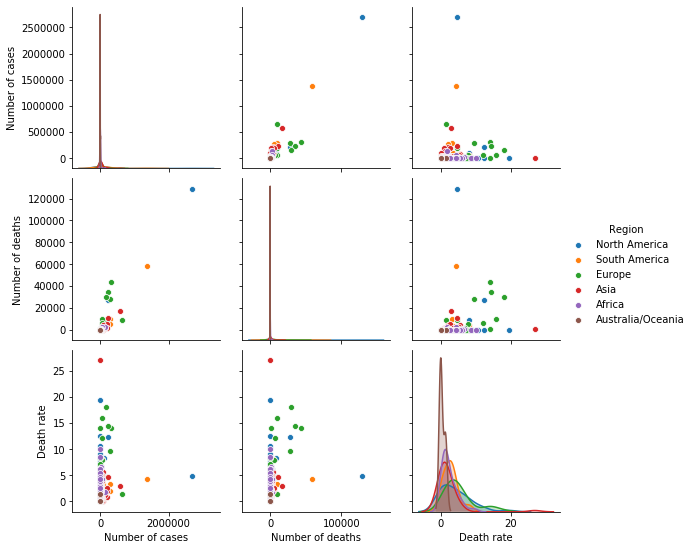

In [16]:
#Visualize the relationship between the numeric data- number of cases, death and death rate 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df_2,hue="Region");

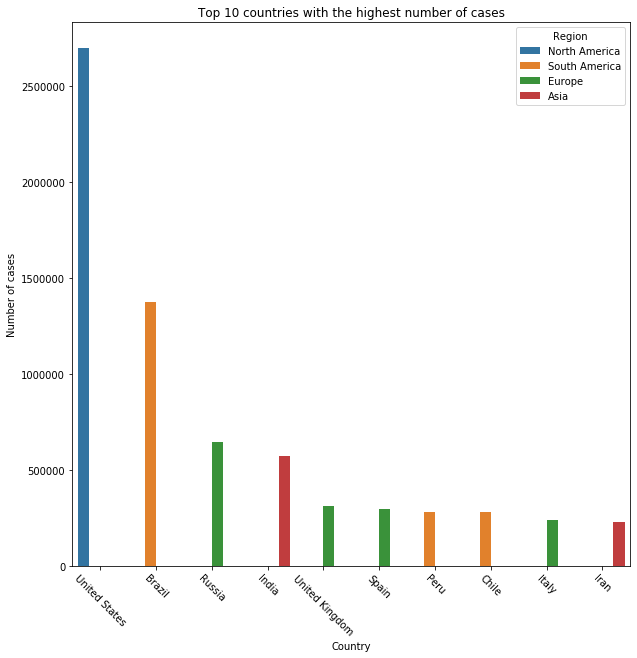

In [17]:
#View country vs number of cases via barplot
plt.figure(figsize=(10,10))
sns.barplot(x='Country',y='Number of cases',data=df_2.head(10),hue='Region')
plt.title('Top 10 countries with the highest number of cases')
# Rotate x-labels
plt.xticks(rotation=-45);

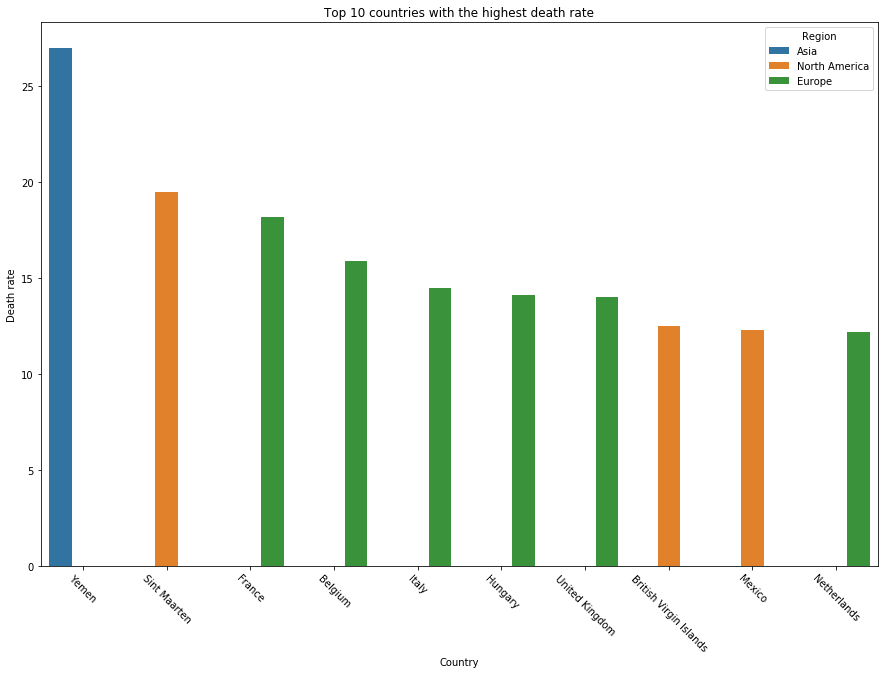

In [18]:
#View country vs death rate via barplot
plt.figure(figsize=(15,10))
sns.barplot(x='Country',y='Death rate',data=df_2.sort_values(['Death rate'],ascending=False).head(10),hue='Region')
plt.title('Top 10 countries with the highest death rate')

# Rotate x-labels
plt.xticks(rotation=-45);

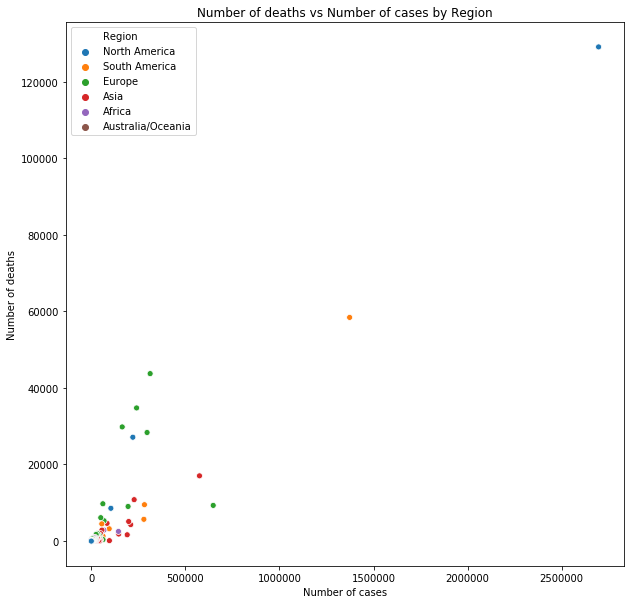

In [19]:
#Visualize scatterplot of number of cases and deaths 

plt.figure(figsize=(10,10))
sns.scatterplot(x='Number of cases',y='Number of deaths',data=df_2,hue='Region')
plt.title('Number of deaths vs Number of cases by Region');



In [20]:
#Group the region by number of cases and visualize it

df_3=df_2.groupby(by=['Region'], as_index=False).agg({'Number of cases': 'sum', 'Number of deaths': 'sum','Death rate':'mean'})

In [21]:
#View the grouped dataframe
df_3

,Region,Number of cases,Number of deaths,Death rate
0,Africa,397484,9930,2.441535
1,Asia,2288572,56517,2.024268
2,Australia/Oceania,9476,126,0.461166
3,Europe,2440354,191478,5.218551
4,North America,3144812,167881,4.276267
5,South America,2193271,83808,2.792836


In [22]:
#Sort by number of cases descending
df_4=df_3.sort_values(['Number of cases'],ascending=False)

In [23]:
#View the sorted dataframe
df_4

,Region,Number of cases,Number of deaths,Death rate
4,North America,3144812,167881,4.276267
3,Europe,2440354,191478,5.218551
1,Asia,2288572,56517,2.024268
5,South America,2193271,83808,2.792836
0,Africa,397484,9930,2.441535
2,Australia/Oceania,9476,126,0.461166


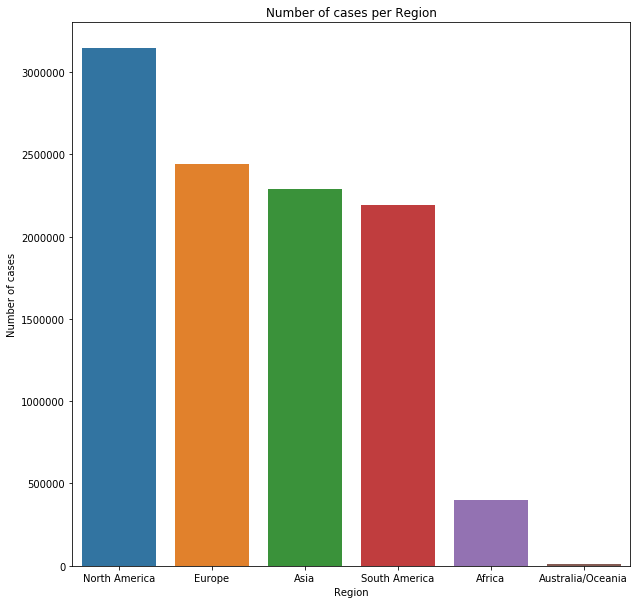

In [24]:
#Visualize the number of cases across the region

plt.figure(figsize=(10,10))
sns.barplot(x='Region',y='Number of cases',data=df_4)
plt.title('Number of cases per Region');


I referred to the following websites to learn more about web-scraping with beautiful soup:

* https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/
* https://www.pluralsight.com/guides/web-scraping-with-beautiful-soup
* https://www.studytonight.com/post/scraping-covid19-data-using-python-beautifulsoup